# Продажа квартир в Санкт-Петербурге - анализ рынка недвижимости


**Описание проекта** - в  распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель** - построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.

**Задача** — используя данные сервиса Яндекc Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир. 

**Исследование пройдет в четыре этапа:**

1. Изучение данных из файла.
2. Предобработка данных.
3. Расчеты и добавление результатов в таблицу.
4. Исследовательский анализ данных.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Итак, в таблице 21 столбец. Тип данных object (3 столбца), int64 (3 столбца), float64 (14 столбцов), bool (2 столбца).

Согласно документации к данным:
*	`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
*	`balcony` — число балконов
*	`ceiling_height` — высота потолков (м)
*	`cityCenters_nearest` — расстояние до центра города (м)
*	`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
*	`first_day_exposition` — дата публикации
*	`floor` — этаж
*	`floors_total` — всего этажей в доме
*	`is_apartment` — апартаменты (булев тип)
*	`kitchen_area` — площадь кухни в квадратных метрах (м²)
*	`last_price` — цена на момент снятия с публикации
*	`living_area` — жилая площадь в квадратных метрах (м²)
*	`locality_name` — название населённого пункта
*	`open_plan` — свободная планировка (булев тип)
*	`parks_around3000` — число парков в радиусе 3 км
*	`parks_nearest` — расстояние до ближайшего парка (м)
*	`ponds_around3000` — число водоёмов в радиусе 3 км
*	`ponds_nearest` — расстояние до ближайшего водоёма (м)
*	`rooms` — число комнат
*	`studio` — квартира-студия (булев тип)
*	`total_area` — площадь квартиры в квадратных метрах (м²)
*	`total_images` — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.


### Вывод

В каждой строке таблицы — данные, которые характеризуют недвижимость. Часть колонок содержит описание  недвижимости: площадь квартиры, число комнат, жилая площадь, площадь кухни, этаж, всего этажей в доме, высота потолков, число балконов, является ли апартаментами, квартирой-студией или имеет свободную планировку. 

Другие колонки характеризуют местоположение и инфраструктуру: название населённого пункта, расстояние до центра города,  расстояние до ближайшего аэропорта, число парков в радиусе 3 км и  расстояние до ближайшего парка, число водоёмов в радиусе 3 км и расстояние до ближайшего водоёма.

А также сколько дней было размещено объявление (от публикации до снятия), дата публикации, цена на момент снятия с публикации и число фотографий квартиры в объявлении.

Предварительно можно утверждать, что, данных достаточно для установления параметров, определяющих рыночную стоимость объектов недвижимости. Но встречаются пропуски в данных.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Исследование и заполнение пропусков в данных.

Рассмотрим **living_area** (жилая площадь) и **kitchen_area** (площадь кухни). Предположим, что пропущенные значения есть в обоих столбцах.

In [6]:
len(df.query('kitchen_area.isna() and living_area.isna()'))

1464

Одновременно не заполнены данные в 6,2% строчек. Проверим данный показатель в разрезе количества комнат.

In [7]:
df_isna = (
    df.query('kitchen_area.isna() and living_area.isna()')
    .pivot_table(index='rooms',  values='total_area', aggfunc=['count', 'min', 'max', 'median'])
)
df_isna.columns = ['count_0', 'total_area_min_0', 'total_area_max_0', 'total_area_median_0']
df_all = df.pivot_table(index='rooms',  values='total_area', aggfunc='count')
df_all.columns = ['count_all']
df_isna_all = df_isna.merge(df_all, on='rooms', how='left')
df_isna_all['percentage_0']= df_isna_all['count_0'] * 100 / df_isna_all['count_all'] 

df_isna_all


,count_0,total_area_min_0,total_area_max_0,total_area_median_0,count_all,percentage_0
rooms,,,,,,
0,14,19.0,371.0,26.05,197,7.106599
1,522,13.0,494.1,37.00,8047,6.486890
2,479,30.0,196.0,52.60,7940,6.032746
3,339,41.0,251.0,73.10,5814,5.830753
4,72,42.0,500.0,103.80,1180,6.101695
5,27,67.0,422.2,157.00,326,8.282209
6,5,106.0,204.0,184.30,105,4.761905
7,5,100.6,400.0,364.70,59,8.474576
9,1,235.0,235.0,235.00,8,12.500000


Проверим квартиры-студии и квартиры со свободной планировкой на предмет отсутствия данных в обоих столбцах, так как в данной категории квартир могли не проставить жилую площадь и площадь кухни в связи с тем, что определить точно эти данные непросто.

In [8]:
df.query('studio == True or open_plan == True').groupby('rooms')['rooms'].count()

rooms
0    197
1     14
2      1
3      2
4      1
5      1
Name: rooms, dtype: int64

In [9]:
df.query('(studio == True or open_plan == True) and (kitchen_area.isna() and living_area.isna())').groupby('rooms')['rooms'].count()

rooms
0    14
5     1
Name: rooms, dtype: int64

Из таблицы видно, что, во-первых, разброс общей площади в разрезе количества комнат очень большой, во-вторых, квартиры имеющие наибольший объем строк (1, 2, 3 и 4 комнаты) имеют примерно одинаковый процент отсутствия данных одновременно в обоих колонках (от 5,8 до 6,5%), в-третьих,  остальные квартиры, не считая 9-ти комнатной, от 4,8 до 8,5%, в том числе квартиры-студии и квартиры со свободной планировкой 6,9%, что обусловлено небольшой выборкой по сравнению с другими параметрами.

Таким образом, в связи с тем, что данный показатель распределяется примерно одинаково и корректно внести отсутствующие значения не возможно удалим их.

In [10]:
df = df.drop(df.query('kitchen_area.isna() and living_area.isna()').index).reset_index(drop=True)
len(df.query('kitchen_area.isna() and living_area.isna()'))


0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22235 entries, 0 to 22234
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22235 non-null  int64  
 1   last_price            22235 non-null  float64
 2   total_area            22235 non-null  float64
 3   first_day_exposition  22235 non-null  object 
 4   rooms                 22235 non-null  int64  
 5   ceiling_height        13935 non-null  float64
 6   floors_total          22182 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 22235 non-null  int64  
 9   is_apartment          2703 non-null   object 
 10  studio                22235 non-null  bool   
 11  open_plan             22235 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               11915 non-null  float64
 14  locality_name         22190 non-null  object 
 15  airports_nearest   

Рассмотрим столбец **rooms** (число комнат).

In [12]:
df['rooms'].describe()

count    22235.000000
mean         2.072318
std          1.078458
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [13]:
df['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

In [14]:
len(df.query('rooms == 0'))

183

In [15]:
len(df.query('rooms == 0 and living_area.isna()'))

0

In [16]:
len(df.query('rooms == 0 and kitchen_area.isna()'))

183

In [17]:
df.query('rooms == 0').groupby('studio')['studio'].count()

studio
False     55
True     128
Name: studio, dtype: int64

In [18]:
df.query('rooms == 0 and studio == False').groupby('open_plan')['open_plan'].count()

open_plan
True    55
Name: open_plan, dtype: int64

Таким образом, нулевые значения в столбце **rooms** соответствуют 55 квартирам с открытой планировкой и 128 квартирам-студиям. 

Рассмотрим **общую**, **жилую площадь** и **площадь кухни**.

In [19]:
df[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,22235.000000,21796.000000,21421.000000
mean,60.293450,34.457852,10.569807
std,35.210415,22.030445,5.905438
min,12.000000,2.000000,1.300000
25%,40.000000,18.600000,7.000000
50%,52.000000,30.000000,9.100000
75%,70.000000,42.300000,12.000000
max,900.000000,409.700000,112.000000


Минимальное значение жилой площади  2 м² выглядит не корректно. Выведем строчки где жилая площадь менее 6 м².

In [20]:
df.query('living_area < 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3045,7,4440000.0,41.0,2017-07-02T00:00:00,1,NaN,17.0,3.0,17,NaN,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13072,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.0,6.0,2.0,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
16478,11,2680000.0,22.0,2018-08-11T00:00:00,0,NaN,25.0,5.0,8,NaN,...,NaN,2.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
20411,0,2330000.0,23.0,2018-01-01T00:00:00,0,NaN,24.0,2.0,22,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
20590,15,6100000.0,77.6,2019-02-28T00:00:00,4,2.5,9.0,5.4,1,NaN,...,9.8,NaN,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
22119,14,64990000.0,139.0,2015-11-24T00:00:00,3,3.0,8.0,3.0,8,NaN,...,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Получилось шесть строк, из них пять подлежат удалению, так как корректному заполнению не подлежат (данная жилая площадь не может соответствовать общей площади и площади кухни). Жилая площадь 4-комнатной квартиры выглядит как случайно поставленная точка, поэтому заменим 5.4 на 54.

In [21]:
df['living_area'] = df['living_area'].replace(5.4, 54)
df = df.drop(df.query('living_area < 6').index).reset_index(drop=True)

In [22]:
len(df.query('living_area.isna()'))

439

In [23]:
df_living_0 = (
    df.query('living_area.isna()')
    .pivot_table(index='rooms',  values='total_area', aggfunc=['count', 'min', 'max', 'median'])
)
df_living_0

,count,min,max,median
,total_area,total_area,total_area,total_area
rooms,,,,
1,137,27.00,178.30,38.8
2,165,33.95,141.00,57.8
3,109,42.00,363.10,79.0
4,19,73.00,441.98,130.0
5,7,110.00,254.00,133.0
6,1,500.00,500.00,500.0
7,1,631.00,631.00,631.0


Выявлено 439 строк с пропущенными значениями в столбце **living_area** (жилая площадь) в квартирах  от 1 до 7 комнат. Найдем долю жилой площади по отношению к общей площади в разрезе количества комнат. 

In [24]:
df_living_median = (
    df.query('~living_area.isna() and 0 < rooms < 8')
    .pivot_table(index='rooms',  values=['total_area', 'living_area'] , aggfunc= 'median')
)
df_living_median['ratio_median'] = df_living_median['living_area'] / df_living_median['total_area']
df_living_median

,living_area,total_area,ratio_median
rooms,,,
1,17.600,36.5,0.482192
2,30.500,53.0,0.575472
3,45.000,72.6,0.619835
4,63.600,98.5,0.645685
5,91.785,145.2,0.632128
6,123.900,183.7,0.674469
7,145.000,213.0,0.680751


In [25]:
def living_median (room):
    for index, ratio_median in enumerate(df_living_median['ratio_median'], start=1): 
        if room == index:
            return ratio_median   

In [26]:
df['living_area'] = df['living_area'].fillna(df.query('rooms==1')['total_area'] * living_median(1))
df['living_area'] = df['living_area'].fillna(df.query('rooms==2')['total_area'] * living_median(2))
df['living_area'] = df['living_area'].fillna(df.query('rooms==3')['total_area'] * living_median(3))
df['living_area'] = df['living_area'].fillna(df.query('rooms==4')['total_area'] * living_median(4))
df['living_area'] = df['living_area'].fillna(df.query('rooms==5')['total_area'] * living_median(5))
df['living_area'] = df['living_area'].fillna(df.query('rooms==6')['total_area'] * living_median(6))
df['living_area'] = df['living_area'].fillna(df.query('rooms==7')['total_area'] * living_median(7))
len(df.query('living_area.isna()'))

0

In [27]:
df[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,22230.000000,22230.000000,21418.000000
mean,60.294551,34.599604,10.569607
std,35.208311,22.413006,5.905724
min,12.000000,6.000000,1.300000
25%,40.000000,18.700000,7.000000
50%,52.000000,30.000000,9.100000
75%,70.000000,42.400000,12.000000
max,900.000000,429.553991,112.000000


После заполнения пропущенных значений в столбце **living_area** статистические параметры практически не изменились, следовательно замена выполнена корректно.

Теперь рассмотрим столбец **kitchen_area** (площадь кухни). 

In [28]:
len(df.query('kitchen_area.isna()'))

812

In [29]:
df_kitchen_0 = (
    df.query('kitchen_area.isna()')
    .pivot_table(index='rooms',  values='total_area', aggfunc=['count', 'min', 'max', 'median'])
)
df_kitchen_0

,count,min,max,median
,total_area,total_area,total_area,total_area
rooms,,,,
0,181,15.5,98.4,26.10
1,312,12.0,72.0,30.40
2,175,32.4,102.0,54.40
3,95,41.7,280.0,72.10
4,27,48.8,317.0,97.20
5,14,62.2,380.0,114.05
6,3,102.7,213.0,189.00
7,2,249.0,400.0,324.50


Выявлено 812 строк с пропущенными значениями в столбце **kitchen_area** (площадь кухни) в квартирах  от 1 до 8 комнат, а также квартирах-студиях и квартирах со свободной планировкой. Найдем долю площади кухни по отношению к общей площади в разрезе количества комнат. 

In [30]:
df_kitchen_median = (
    df.query('~kitchen_area.isna() and rooms < 9')
    .pivot_table(index='rooms',  values=['total_area', 'living_area', 'kitchen_area'] , aggfunc= 'median')
)
df_kitchen_median['ratio_median'] = df_kitchen_median['kitchen_area'] / df_kitchen_median['total_area']

df_kitchen_median

,kitchen_area,living_area,total_area,ratio_median
rooms,,,,
1,9.025,17.6,36.8,0.245245
2,8.800,30.5,53.0,0.166038
3,9.500,45.0,72.9,0.130316
4,11.100,63.9,99.1,0.112008
5,15.100,92.9,146.9,0.102791
6,19.500,123.9,183.7,0.106151
7,20.000,145.0,212.0,0.094340
8,25.000,160.0,235.0,0.106383


Заменим пропущенные значения в столбце **kitchen_area** в зависимости от количества комнат. Так как у квартир-студий и квартир со свободной планировкой отсутствуют данные по площади кухни, но по общей площади они близки к однокомнатным квартирам, то будем использовать их коэффициент.

In [31]:
def kitchen_median (room):
    for index, ratio_median in enumerate(df_kitchen_median['ratio_median'], start=1): 
        if room == index:
            return ratio_median  

In [32]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.query('rooms==0')['total_area'] * kitchen_median (1))
df['kitchen_area'] = df['kitchen_area'].fillna(df.query('rooms==1')['total_area'] * kitchen_median (1))
df['kitchen_area'] = df['kitchen_area'].fillna(df.query('rooms==2')['total_area'] * kitchen_median (2))
df['kitchen_area'] = df['kitchen_area'].fillna(df.query('rooms==3')['total_area'] * kitchen_median (3))
df['kitchen_area'] = df['kitchen_area'].fillna(df.query('rooms==4')['total_area'] * kitchen_median (4))
df['kitchen_area'] = df['kitchen_area'].fillna(df.query('rooms==5')['total_area'] * kitchen_median (5))
df['kitchen_area'] = df['kitchen_area'].fillna(df.query('rooms==6')['total_area'] * kitchen_median (6))
df['kitchen_area'] = df['kitchen_area'].fillna(df.query('rooms==7')['total_area'] * kitchen_median (7))
df['kitchen_area'] = df['kitchen_area'].fillna(df.query('rooms==8')['total_area'] * kitchen_median (8))

len(df.query('kitchen_area.isna()'))

0

In [33]:
df[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,22230.000000,22230.000000,22230.000000
mean,60.294551,34.599604,10.499560
std,35.208311,22.413006,5.850267
min,12.000000,6.000000,1.300000
25%,40.000000,18.700000,7.000000
50%,52.000000,30.000000,9.000000
75%,70.000000,42.400000,12.000000
max,900.000000,429.553991,112.000000


После заполнения пропущенных значений в столбце **kitchen_area** статистические параметры практически не изменились, следовательно замена выполнена корректно. 

Минимальное значение площади кухни 1.3 м², выведем строчки с площадью кухни менее 3 м².

In [34]:
df.query(' kitchen_area < 3 ')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
856,15,2600000.0,27.00,2017-07-10T00:00:00,1,2.75,23.0,18.0,18,NaN,...,2.000000,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
5870,9,3100000.0,24.00,2018-06-25T00:00:00,2,3.00,5.0,16.0,5,NaN,...,2.000000,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
7456,3,5967734.0,66.40,2017-02-07T00:00:00,2,NaN,4.0,44.4,2,False,...,2.890000,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,0.0,NaN,335.0
8197,9,2200000.0,18.40,2018-08-20T00:00:00,1,2.52,3.0,14.0,3,NaN,...,2.400000,NaN,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0
8591,17,2920000.0,23.29,2018-12-12T00:00:00,1,NaN,3.0,21.0,1,NaN,...,2.000000,NaN,Санкт-Петербург,19506.0,4008.0,0.0,NaN,2.0,45.0,107.0
10361,6,5350000.0,32.00,2016-04-20T00:00:00,1,NaN,14.0,16.0,10,NaN,...,2.000000,0.0,Санкт-Петербург,19008.0,3953.0,0.0,NaN,1.0,69.0,210.0
15349,2,2720000.0,25.70,2017-10-30T00:00:00,1,NaN,19.0,22.6,11,NaN,...,2.000000,NaN,Санкт-Петербург,14472.0,13268.0,0.0,NaN,0.0,NaN,109.0
16715,5,2940000.0,34.70,2017-10-09T00:00:00,1,NaN,26.0,15.5,14,NaN,...,2.300000,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,318.0
18414,5,1190000.0,14.00,2018-07-29T00:00:00,1,NaN,5.0,11.0,1,NaN,...,2.000000,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
18662,4,2400000.0,12.00,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,NaN,...,2.942935,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0


Получилось 12 строк с неправдоподобно маленькой площадью кухни, удалим их.

In [35]:
df = df.drop(df.query('kitchen_area < 3 ').index).reset_index(drop=True)

In [36]:
df[['total_area', 'living_area', 'kitchen_area']].describe()

,total_area,living_area,kitchen_area
count,22218.000000,22218.000000,22218.000000
mean,60.312444,34.608299,10.504068
std,35.208003,22.415045,5.848620
min,13.000000,6.000000,3.000000
25%,40.000000,18.700000,7.000000
50%,52.000000,30.000000,9.000000
75%,70.000000,42.400000,12.000000
max,900.000000,429.553991,112.000000


Рассмотрим столбец **ceiling_height** (высота потолков).

In [37]:
df['ceiling_height'].describe()

count    13927.000000
mean         2.773330
std          1.285069
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [38]:
len(df.query('ceiling_height.isna()'))

8291

Выведем строки с высотой потолков менее 2 м и более 8.

In [39]:
df[(df['ceiling_height'] < 2) | (df['ceiling_height'] > 8)].groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
1.00      1
1.20      1
1.75      1
8.30      1
10.30     1
14.00     1
20.00     1
22.60     1
24.00     1
25.00     7
26.00     1
27.00     8
27.50     1
32.00     2
100.00    1
Name: ceiling_height, dtype: int64

Четыре строчки с высотой потолка менее 2 м и 100 м подлежат удалению. Высота потолков от 24 до 32 выглядит так как-будто не поставили точку, поэтому поделим на 10.

In [40]:
df = df.drop(df.query('ceiling_height < 2 or ceiling_height == 100').index).reset_index(drop=True)

In [41]:
df.loc[(df['ceiling_height'] >= 24) & (df['ceiling_height'] <= 32), 'ceiling_height'] = df.loc[(df['ceiling_height'] >= 24) & (df['ceiling_height'] <= 32), 'ceiling_height'] / 10

In [42]:
df[(df['ceiling_height'] < 2) | (df['ceiling_height'] > 8)].groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
8.3     1
10.3    1
14.0    1
20.0    1
22.6    1
Name: ceiling_height, dtype: int64

В столбце **ceiling_height** (высота потолков) пропущено 8291 значений или 37,3% данных. Заменим пропущенные значения медианой (2.65 м).

In [43]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [44]:
df['ceiling_height'].describe()

count    22214.000000
mean         2.701545
std          0.306520
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         22.600000
Name: ceiling_height, dtype: float64

Рассмотрим столбцы **floors_total** (всего этажей в доме) и **floor** (этаж).

In [45]:
df[['floors_total', 'floor']].describe()

,floors_total,floor
count,22161.000000,22214.000000
mean,10.670141,5.898668
std,6.577388,4.875504
min,1.000000,1.000000
25%,5.000000,2.000000
50%,9.000000,4.000000
75%,16.000000,8.000000
max,60.000000,33.000000


In [46]:
len(df.query('floors_total.isna()'))

53

In [47]:
df.query('floors_total.isna()').groupby('floor')['floor'].count()

floor
1     1
3     1
4     5
5     1
6     7
7     2
8     7
9     2
11    2
12    6
13    2
14    2
15    2
18    2
19    3
20    2
21    3
22    1
23    1
24    1
Name: floor, dtype: int64

Этажность дома пропущена в 53 строках (0,2%), заполнить пропущенные значения корректно не возможно, удалим строки.

In [48]:
df = df.drop(df.query('floors_total.isna()').index).reset_index(drop=True)

In [49]:
df[['floors_total', 'floor']].describe()

,floors_total,floor
count,22161.000000,22161.000000
mean,10.670141,5.885610
std,6.577388,4.864894
min,1.000000,1.000000
25%,5.000000,2.000000
50%,9.000000,4.000000
75%,16.000000,8.000000
max,60.000000,33.000000


Рассмотрим столбец **balcony** (число балконов).

In [50]:
df['balcony'].describe()

count    11880.000000
mean         1.162458
std          1.071265
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [51]:
df['balcony'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

In [52]:
len(df.query('balcony.isna()'))

10281

In [53]:
df.query('~balcony.isna()').groupby('balcony')['balcony'].count()

balcony
0.0    3583
1.0    4126
2.0    3611
3.0      79
4.0     180
5.0     301
Name: balcony, dtype: int64

Пропущенные данные в столбце **balcony** предположительно означают, что балконов в квартире нет. Заменим пропущенные значения на нули.

In [54]:
df['balcony'] = df['balcony'].fillna(0)
df.groupby('balcony')['balcony'].count()

balcony
0.0    13864
1.0     4126
2.0     3611
3.0       79
4.0      180
5.0      301
Name: balcony, dtype: int64


Рассмотрим столбец **days_exposition** (сколько дней было размещено объявление (от публикации до снятия))

In [55]:
df['days_exposition'].describe()

count    19098.000000
mean       184.887580
std        221.835742
min          1.000000
25%         44.000000
50%        101.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [56]:
len(df.query('days_exposition.isna()'))

3063

Отсутствующие значения в столбце **days_exposition** предположительно означают, что объявление еще не снято. 

Рассмотрим столбец `is_apartment` (апартаменты).

In [57]:
df.groupby('is_apartment')['is_apartment'].count()

is_apartment
False    2658
True       43
Name: is_apartment, dtype: int64

In [58]:
len(df.query('is_apartment.isna()'))

19460

Апартаменты составлят небольшую долю среди недвижимости, поэтому пропущенные значения предположительно относятся к квартирам. 

In [59]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df.groupby('is_apartment')['is_apartment'].count()

is_apartment
False    22118
True        43
Name: is_apartment, dtype: int64

Рассмотрим столбец **locality_name** (название населённого пункта).

In [60]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Советский', 'городской посёлок Фёдоро

Выявлено разное написание е и ё в слове "поселок", приведем к единообразию.

In [61]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Советский',
       'городской поселок Федоровское', 'городской поселок Ян

In [62]:
len(df.query('locality_name.isna()'))

44

In [63]:
df.query('locality_name.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1029,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.800000,2,False,...,8.800000,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
1905,6,5398000.0,80.00,2017-05-30T00:00:00,3,2.65,4.0,42.600000,2,False,...,18.600000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2442,20,3351765.0,42.70,2015-09-20T00:00:00,1,2.65,24.0,15.600000,3,False,...,10.700000,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2470,2,5130593.0,62.40,2015-10-11T00:00:00,2,2.65,24.0,33.100000,21,False,...,8.200000,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3350,10,4200000.0,46.50,2016-05-28T00:00:00,2,2.65,5.0,30.800000,5,False,...,6.500000,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
3891,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.620000,7,False,...,13.380000,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
3926,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.300000,3,False,...,10.400000,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4993,19,13540000.0,85.50,2016-01-20T00:00:00,3,2.65,7.0,59.100000,5,False,...,8.300000,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5339,7,3700000.0,30.00,2016-04-29T00:00:00,1,2.65,24.0,20.000000,23,False,...,7.357337,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0
6326,20,4895892.0,60.70,2015-03-12T00:00:00,2,2.65,24.0,31.900000,3,False,...,12.200000,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,468.0


In [64]:
df.query('cityCenters_nearest == 17369.0 and airports_nearest == 22041.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2442,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.65,24.0,15.6,3,False,...,10.70000,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2470,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.65,24.0,33.1,21,False,...,8.20000,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
6326,20,4895892.0,60.7,2015-03-12T00:00:00,2,2.65,24.0,31.9,3,False,...,12.20000,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,468.0
12374,1,2919911.0,29.4,2015-03-12T00:00:00,1,2.75,24.0,21.1,2,False,...,7.21019,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,470.0
13355,2,4422000.0,60.0,2016-03-23T00:00:00,2,2.75,23.0,32.0,14,False,...,11.90000,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,90.0
15424,2,4995573.0,56.9,2016-06-17T00:00:00,2,2.65,24.0,29.2,14,False,...,10.90000,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,4.0
18667,20,4361004.0,62.4,2015-09-20T00:00:00,2,2.65,24.0,33.1,21,False,...,8.20000,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,278.0
21440,20,3176015.0,33.3,2015-04-22T00:00:00,1,2.65,23.0,15.4,22,False,...,9.00000,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,427.0


Пропущены названия населенного пункта в 44 строках, внести  значения  достоверно не возможно, поэтому удалим их.

In [65]:
df = df.drop(df.query('locality_name.isna()').index).reset_index(drop=True)
len(df.query('locality_name.isna()'))

0

**Рассмотрим столбцы показывающие расстояния до объектов (аэропорт, парк, водоем) и  число парков и водоемов в радиусе 3 км.**

In [66]:
df[['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']].describe()

,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
count,17063.000000,17084.000000,17085.000000,7583.000000,17085.000000,8512.000000
mean,28807.129813,14220.274819,0.609892,488.474878,0.767749,518.507049
std,12643.998097,8654.683112,0.800262,339.557891,0.939408,277.038696
min,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000
25%,18551.000000,9282.500000,0.000000,287.000000,0.000000,295.000000
50%,26766.000000,13094.000000,0.000000,451.000000,0.000000,503.000000
75%,37313.000000,16271.000000,1.000000,610.000000,1.000000,730.000000
max,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000


In [67]:
len(df.query('airports_nearest.isna()'))

5054

In [68]:
len(df.query('cityCenters_nearest.isna()'))

5033

In [69]:
len(df.query('parks_around3000.isna()'))

5032

In [70]:
len(df.query('ponds_around3000.isna()'))

5032

В четырех столбцах (**airports_nearest** (расстояние до ближайшего аэропорта), **cityCenters_nearest** (расстояние до центра города), **parks_around3000** (число парков в радиусе 3 км), **ponds_around3000** (число водоёмов в радиусе 3 км)) примерно одинаковое количество пропусков. 

Найдем количество пропущенных значений одновременно в четырех столбцах.

In [71]:
len(df.query('airports_nearest.isna() and cityCenters_nearest.isna() and parks_around3000.isna() and ponds_around3000.isna()'))

5032

In [72]:
len(df['locality_name'].sort_values().unique())

315

In [73]:
len(df.query('airports_nearest.isna() and cityCenters_nearest.isna() and parks_around3000.isna() and ponds_around3000.isna()')['locality_name'].sort_values().unique())

298

Таким образом, пропущенные значения предположительно не заполнялись на этапе подачи заявки, так как пропущенные значения находятся в одних и тех же строчках и в 95% названий населенных пунктов.

Рассмотрим столбцы **parks_nearest** (расстояние до ближайшего парка) и **ponds_nearest** (расстояние до ближайшего водоёма).

In [74]:
len(df.query('parks_nearest.isna()'))

14534

In [75]:
len(df.query('ponds_nearest.isna()'))

13605

In [76]:
len(df.query('parks_nearest.isna() and ponds_nearest.isna()'))

10536

Проверим строки на дубликаты.

In [77]:
df.duplicated().sum()

0

Большую часть пропущенных значений скорее всего не заполнили на этапе подачи заявки.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22117 entries, 0 to 22116
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22117 non-null  int64  
 1   last_price            22117 non-null  float64
 2   total_area            22117 non-null  float64
 3   first_day_exposition  22117 non-null  object 
 4   rooms                 22117 non-null  int64  
 5   ceiling_height        22117 non-null  float64
 6   floors_total          22117 non-null  float64
 7   living_area           22117 non-null  float64
 8   floor                 22117 non-null  int64  
 9   is_apartment          22117 non-null  bool   
 10  studio                22117 non-null  bool   
 11  open_plan             22117 non-null  bool   
 12  kitchen_area          22117 non-null  float64
 13  balcony               22117 non-null  float64
 14  locality_name         22117 non-null  object 
 15  airports_nearest   

Таким образом, количество строк после корректировки и заполнения пропусков в данных уменьшилоь на 6,7% в основном за счет одновременного отсутствия данных в двух столбцах: жилая площадь и площадь кухни (6,2%).

### Изменение типов данных


Столбец **first_day_exposition** (дата публикации) переведем из типа object в тип datetime методом to_datetime() для того, чтобы можно было совершать операции с данными.

In [79]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Переведем столбцы **floors_total**,  **balcony** в тип  integer, так как этажи и балконы должны быть целыми числами.

In [80]:
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22117 entries, 0 to 22116
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22117 non-null  int64         
 1   last_price            22117 non-null  float64       
 2   total_area            22117 non-null  float64       
 3   first_day_exposition  22117 non-null  datetime64[ns]
 4   rooms                 22117 non-null  int64         
 5   ceiling_height        22117 non-null  float64       
 6   floors_total          22117 non-null  int64         
 7   living_area           22117 non-null  float64       
 8   floor                 22117 non-null  int64         
 9   is_apartment          22117 non-null  bool          
 10  studio                22117 non-null  bool          
 11  open_plan             22117 non-null  bool          
 12  kitchen_area          22117 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

Рассчитаем и добавим в таблицу столбец **price_square_meter** (цена квадратного метра).

In [82]:
df['price_square_meter'] = (df['last_price'] / df['total_area']).astype('int')

Добавим столбцы: **week_exposition** (день недели публикации объявления), **month_exposition** (месяц публикации объявления) и **year_exposition** (год публикации объявления).

In [83]:
df['week_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month 
df['year_exposition'] = df['first_day_exposition'].dt.year 

Добавим столбец **floor_category** (категория этажа) с параметрами  первый, последний и другой.

In [84]:
df['floor_category'] = 'последний'
df['floor_category'] = df['floor_category'].where(df['floor'] == df['floors_total'], 'другой')
df['floor_category'] = df['floor_category'].where(df['floor'] > 1, 'первый')


Добавим столбцы **ratio_living_total** (отношение жилой площади к общей) и **ratio_kitchen_total** (отношение площади кухни к общей).

In [85]:
df['ratio_living_total'] = df['living_area'] / df['total_area']

In [86]:
df['ratio_kitchen_total'] = df['kitchen_area'] / df['total_area']

In [87]:
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,week_exposition,month_exposition,year_exposition,floor_category,ratio_living_total,ratio_kitchen_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,2.0,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,0.0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000
4,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,NaN,NaN,55.0,95065,0,9,2018,другой,0.473684,0.299342
5,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,False,...,0.0,NaN,155.0,99195,3,11,2017,другой,0.284182,0.386059
6,5,7915000.0,71.60,2019-04-18,2,2.65,24,41.203774,22,False,...,0.0,NaN,NaN,110544,3,4,2019,другой,0.575472,0.263966
7,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,NaN,NaN,189.0,87454,2,5,2018,другой,0.465320,0.265682
8,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,0.0,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557
9,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3,False,...,2.0,553.0,137.0,127525,3,11,2017,другой,0.512626,0.214646


## Исследовательский анализ данных

### Исследование площади, цены, числа комнат и высоты потолков.

#### Исследование площади

Рассмотрим числовые характеристики и построим диаграмму размаха методом boxplot().

In [88]:
df['total_area'].describe() 

count    22117.000000
mean        60.284393
std         35.202582
min         13.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

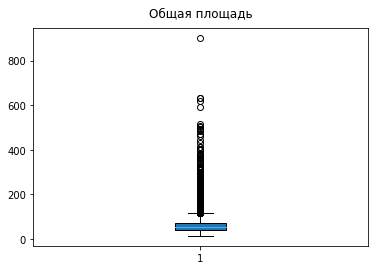

In [89]:
plt.boxplot(df['total_area'], patch_artist=True)
plt.title("Общая площадь", pad=12)
plt.show()

Диаграмма не информативна, поэтому рассчитаем верхнюю границу нормального распределения (114,5 м²) и построим новую диаграмму.

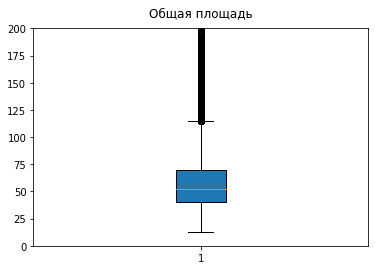

In [90]:
plt.boxplot(df['total_area'], patch_artist=True)
plt.title("Общая площадь", pad=12)
plt.ylim(0, 200)
plt.show()

Таким образом, по результатам общая площадь свыше 114,5 м² похожа на  выбросы. Посчитаем количество строк с общей площадью более 114 м².

In [91]:
len(df.query('total_area > 114'))

1159

In [92]:
len(df.query('total_area > 114 and last_price > 8000000'))

1121

Получилось 1159 строк или 5,2%. Большинство продающихся квартир имеют общую площадь до 114 м². Основная часть попавших в выбросы это элитное жилье и они попали туда в связи с маленькой долью их в предложении.  

Построим диаграмму размаха для строк, которые попали в выбросы.


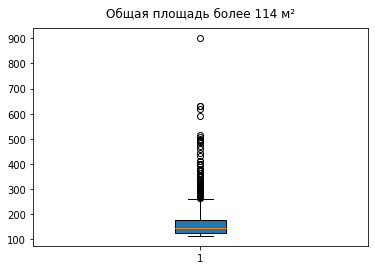

In [93]:
plt.boxplot(df.query('total_area >  114')['total_area'], patch_artist=True)
plt.title("Общая площадь более 114 м²", pad=12)
plt.show()

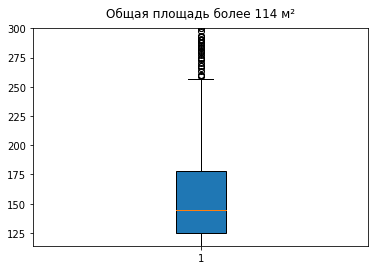

In [94]:
plt.boxplot(df.query('total_area >= 114')['total_area'], patch_artist=True)
plt.title("Общая площадь более 114 м²", pad=12)
plt.ylim(114, 300)
plt.show()

In [95]:
len(df.query('114 < total_area <= 200'))

952

Построим гистограмму по данным с общей площадью до 114 м² и более 114 м².

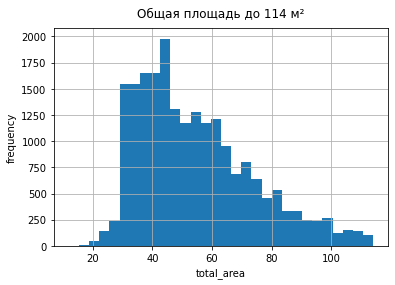

In [96]:
df['total_area'].hist(bins=30, range = (12, 114))
plt.title("Общая площадь до 114 м²", pad=12)
plt.xlabel("total_area")
plt.ylabel("frequency")
plt.show()

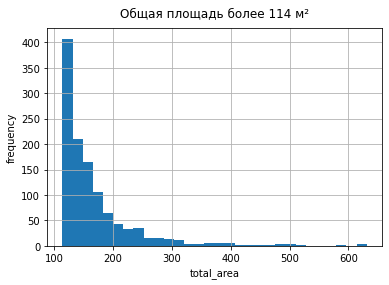

In [97]:
df.query('114 < total_area < 900 ')['total_area'].hist(bins=30)
plt.title("Общая площадь более 114 м²", pad=12)
plt.xlabel("total_area")
plt.ylabel("frequency")
plt.show()

Таким образом, минимальная площадь 12 м², максимальная 900 м². Большинство квартир, представленных на продажу, от 30 до 60 м², что ожидаемо. В выбросы попало в основном элитное жилье (5%, с общей площадью более 114 м² ). Среди них 82% имеют общую площадь от 114 до 200 м².  

#### Исследование стоимости квартиры.

Рассмотрим числовые характеристики и построим диаграмму размаха методом boxplot(). Предварительно создадим переменную last_price со значениями цен в тысячах.

In [98]:
last_price = df['last_price'] / 1000

In [99]:
last_price.describe() 

count     22117.000000
mean       6535.135657
std       10972.799749
min          12.190000
25%        3450.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

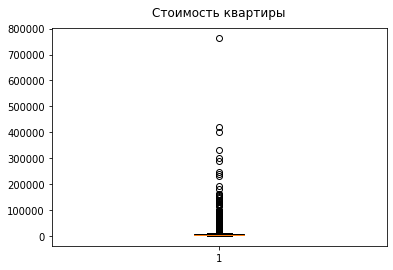

In [100]:
plt.boxplot(last_price, patch_artist=True)
plt.title("Стоимость квартиры", pad=12)
plt.show()

Диаграмма не информативна, поэтому рассчитаем верхнюю границу нормального значения (11825 тыс.) и построим новую диаграмму.

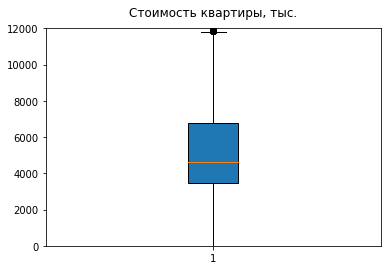

In [101]:
plt.boxplot(last_price, patch_artist=True)
plt.title("Стоимость квартиры, тыс.", pad=12)
plt.ylim(0, 12000)
plt.show()

Значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана не стремится к длинному хвосту с высокими значениями.

In [102]:
len(df.query('last_price > 11825000'))

1905

Получилось 1905 строк или 8,6%.  Построим гистограмму со стоимостью квартиры до 111825 тыс.

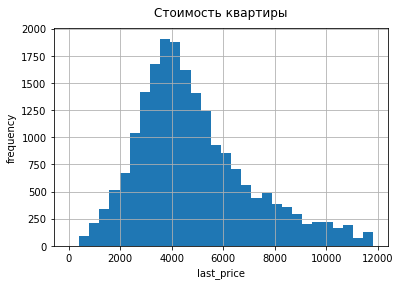

In [103]:
last_price.hist(bins=30, range = (0, 11825))
plt.title("Стоимость квартиры", pad=12)
plt.xlabel("last_price")
plt.ylabel("frequency")
plt.show()

Таким образом, минимальная стоимость квартиры 12,19 тыс. (что странно), максимальная 763000 тыс. На гистограмме график стремится к нормальному распределению. Стоимость большинства квартир (75%), представленных на продажу до 6,8 млн., что выглядит правдоподобно.

#### Исследование количества комнат

In [104]:
df['rooms'].describe() 

count    22117.000000
mean         2.072795
std          1.078716
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

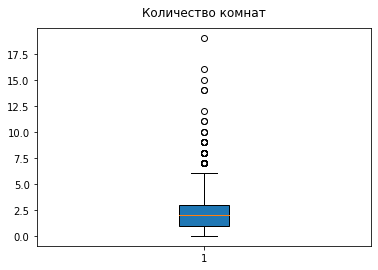

In [105]:
plt.boxplot(df['rooms'], patch_artist=True)
plt.title("Количество комнат", pad=12)
plt.show()

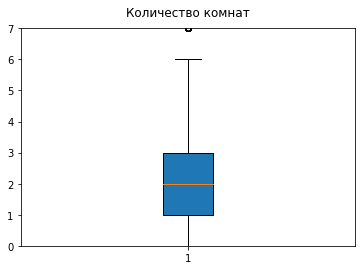

In [106]:
plt.boxplot(df['rooms'], patch_artist=True)
plt.title("Количество комнат", pad=12)
plt.ylim(0, 7)
plt.show()

In [107]:
len(df.query('rooms > 6'))

84

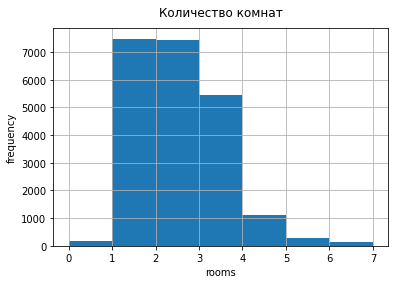

In [108]:
df['rooms'].hist(bins=7, range = (0, 7))
plt.title("Количество комнат", pad=12)
plt.xlabel("rooms")
plt.ylabel("frequency")
plt.show()


Таким образом, представлены данные с числом комнат от 0 до 19 комнат. Среднее арифметическая и медиана почти равны, значит основная часть данных однородна. Граница нормального размаха - 6 комнат, в выбросы попала недвижимость с более 6
комнатами (84 предложения или 0,4%).

Основная часть предложений до 3-х комнат включительно, что ожидаемо.

#### Исследование высоты потолков

In [109]:
df['ceiling_height'].describe() 

count    22117.000000
mean         2.701523
std          0.306938
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         22.600000
Name: ceiling_height, dtype: float64

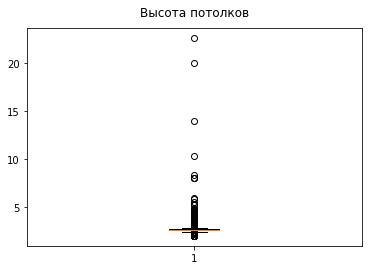

In [110]:
plt.boxplot(df['ceiling_height'], patch_artist=True)
plt.title("Высота потолков", pad=12)
plt.show()

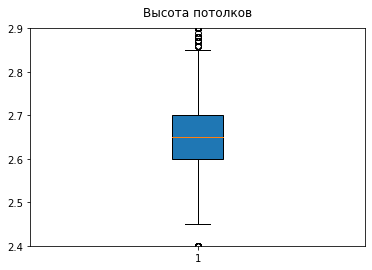

In [111]:
plt.boxplot(df['ceiling_height'], patch_artist=True)
plt.title("Высота потолков", pad=12)
plt.ylim(2.4, 2.9)

plt.show()

In [112]:
len(df.query('ceiling_height > 2.85'))

2767

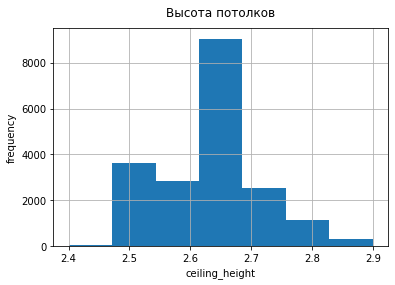

In [113]:
df['ceiling_height'].hist(bins=7, range = (2.4, 2.9))
plt.title("Высота потолков", pad=12)
plt.xlabel("ceiling_height")
plt.ylabel("frequency")
plt.show()

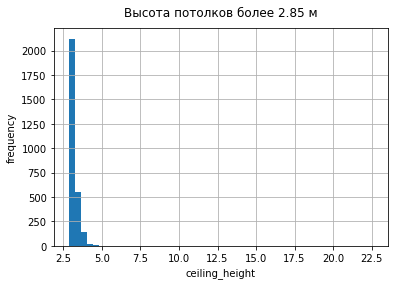

In [114]:
df['ceiling_height'].hist(bins=50, range = (2.85, 22.6))
plt.title("Высота потолков более 2.85 м", pad=12)
plt.xlabel("ceiling_height")
plt.ylabel("frequency")
plt.show()

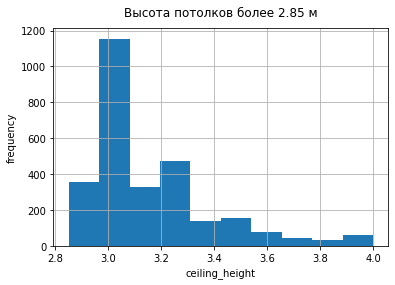

In [115]:
df['ceiling_height'].hist(bins=10, range = (2.85, 4))
plt.title("Высота потолков более 2.85 м", pad=12)
plt.xlabel("ceiling_height")
plt.ylabel("frequency")
plt.show()

In [116]:
len(df.query('2.85 < ceiling_height <= 3.3 '))

2213

Таким образом, высота потолков варьируется от 2 м до 22,6 м. Большая часть значений (75%) не более 2.75 м, что является распространенной высотой потолка. В выбросы попали значения более 2.85 м. (2767 или 12,5%). Из них 80% значений не превышают 3.3 м.

### Исследование количества времени для продажи квартиры

Рассмотрим столбец **days_exposition** (сколько дней было размещено объявление).

In [117]:
df['days_exposition'].describe() 

count    19055.000000
mean       184.738809
std        221.879025
min          1.000000
25%         44.000000
50%        100.000000
75%        238.000000
max       1580.000000
Name: days_exposition, dtype: float64

Заполненных значений 19055 или 86%. Отсутствующие значения предположительно относятся к объявлениям, которые не закрыли на момент выгрузки данных.

Среднее арифметическое на 85% больше медианы, что говорит о большом расбросе данных. Объявления были размещены от 1 дня до 1580 (более 4 лет). Большая часть объявлений закрылись до 238 дней (до 8 месяцев).

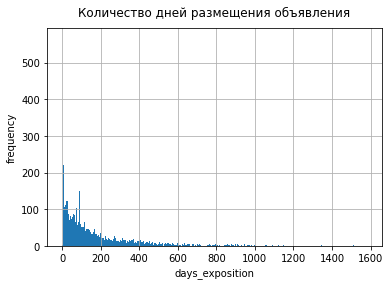

In [118]:
df['days_exposition'].hist(bins=1580)
plt.title("Количество дней размещения объявления", pad=12)
plt.xlabel("days_exposition")
plt.ylabel("frequency")
plt.show()

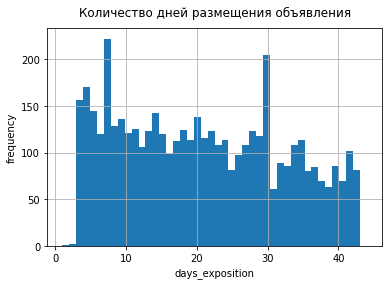

In [119]:
df['days_exposition'].hist(bins=44, range = (1, 44))
plt.title("Количество дней размещения объявления", pad=12)
plt.xlabel("days_exposition")
plt.ylabel("frequency")
plt.show()

In [120]:
len(df.query('days_exposition < 45'))

4796

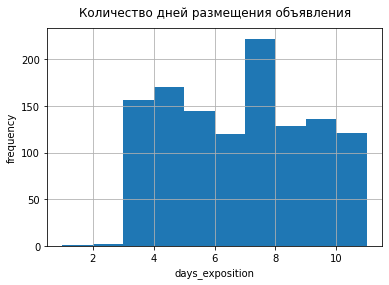

In [121]:
df['days_exposition'].hist(bins=10, range = (1, 11))
plt.title("Количество дней размещения объявления", pad=12)
plt.xlabel("days_exposition")
plt.ylabel("frequency")
plt.show()

Граница нормального размаха равна 529 дням. Найдем количество предложений закрытых более этого количества.

In [122]:
len(df.query('days_exposition > 529'))

1518

Таким образом, продажа недвижимости занимает в среднем около 100 дней. Наблюдаются очень быстрые продажи (1 и 2 дня) и необычно долгие (более 1,5 года).

### Анализ редких и выбивающихся значений

**Анализ общей площади**

В соответствии с п.4.1.1 выбросами в общей площади считаются более 200 м². Исследуем маленькую площадь.

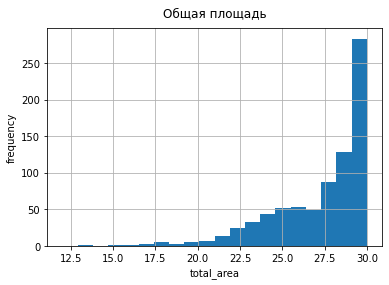

In [123]:
df['total_area'].hist(bins=20, range = (12, 30))
plt.title("Общая площадь", pad=12)
plt.xlabel("total_area")
plt.ylabel("frequency")
plt.show()

In [124]:
len(df.query('total_area >= 200 or total_area <= 20'))

230

In [125]:
df = df.drop(df.query('total_area >= 200 or total_area <= 20').index).reset_index(drop=True)

In [126]:
len(df)

21887

**Анализ стоимости**

В соответствии с п.4.1.2 в выбросы попала стоимость свыше 11825 тыс. (1905 строк), рассмотрим ее.

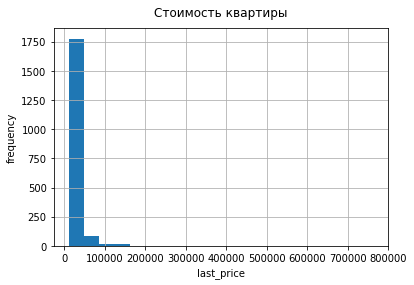

In [127]:
last_price.hist(bins=20, range = (11825, 763000))
plt.title("Стоимость квартиры", pad=12)
plt.xlabel("last_price")
plt.ylabel("frequency")
plt.show()

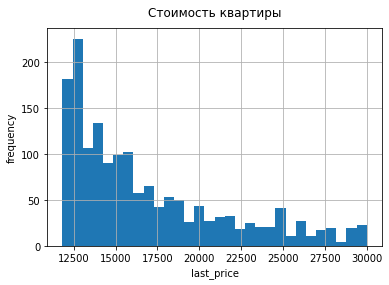

In [128]:
last_price.hist(bins=30, range = (11825, 30000))
plt.title("Стоимость квартиры", pad=12)
plt.xlabel("last_price")
plt.ylabel("frequency")
plt.show()

In [129]:
len(df.query('11825000 < last_price <= 25000000'))

1419

In [130]:
len(df.query('11825000 < last_price'))

1695

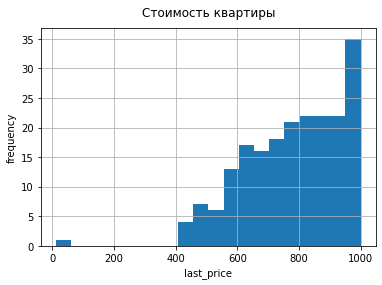

In [131]:
last_price.hist(bins=20, range = (12, 1000))
plt.title("Стоимость квартиры", pad=12)
plt.xlabel("last_price")
plt.ylabel("frequency")
plt.show()

In [132]:
len(df.query('last_price <= 600000'))

31

Из 1905 строк из выбросов после удаления выбивающихся значений площади осталось 1695 строки. Большая часть значений стоимости квартиры (83,7%) сгруппирована в пределах  от 11825 до 25000 тыс.

Редкими значениями является стоимость менее 600 тыс. и более 25 млн.

In [133]:
df = df.drop(df.query('last_price <= 600000 or last_price > 25000000').index).reset_index(drop=True)

In [134]:
len(df)

21580

**Анализ количества комнат**

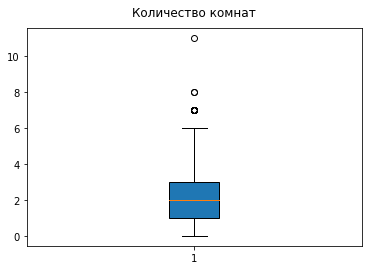

In [135]:
plt.boxplot(df['rooms'], patch_artist=True)
plt.title("Количество комнат", pad=12)
plt.show()

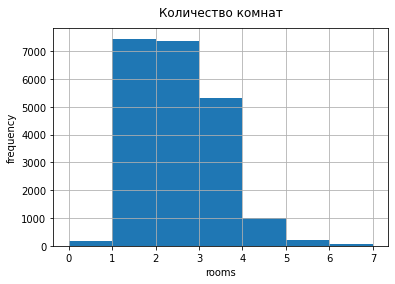

In [136]:
df['rooms'].hist(bins=7, range = (0, 7))
plt.title("Количество комнат", pad=12)
plt.xlabel("rooms")
plt.ylabel("frequency")
plt.show()

In [137]:
len(df.query('rooms > 5'))

71

Редкими значениями оказались квартиры с шестью и более комнатами, они составили всего 71 предложение. Удалим их.

In [138]:
df = df.drop(df.query('rooms > 5').index).reset_index(drop=True)
len(df)

21509

**Анализ высоты потолков**

Из пункта 4.1.4 видно, что в выбросы попали значения менее 2.45 м и более 2.85 м.  Проверим эти значения после предыдущих удалений.

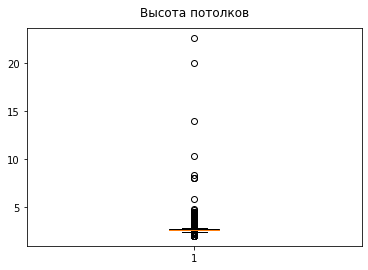

In [139]:
plt.boxplot(df['ceiling_height'], patch_artist=True)
plt.title("Высота потолков", pad=12)
plt.show()

In [140]:
df['ceiling_height'].describe()

count    21509.000000
mean         2.692178
std          0.296272
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         22.600000
Name: ceiling_height, dtype: float64

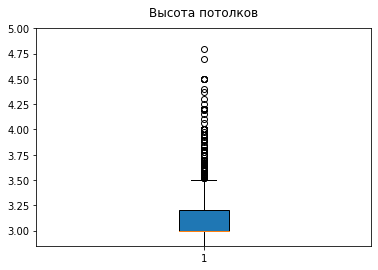

In [141]:
plt.boxplot(df.query('ceiling_height >= 2.85')['ceiling_height'], patch_artist=True)
plt.title("Высота потолков", pad=12)
plt.ylim(2.85, 5)
plt.show()

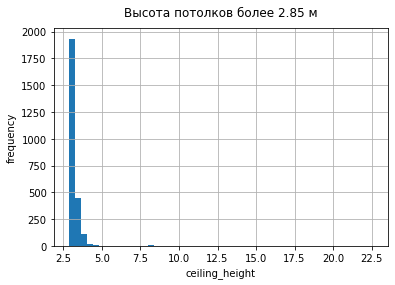

In [142]:
df['ceiling_height'].hist(bins=50, range = (2.85, 22.6))
plt.title("Высота потолков более 2.85 м", pad=12)
plt.xlabel("ceiling_height")
plt.ylabel("frequency")
plt.show()

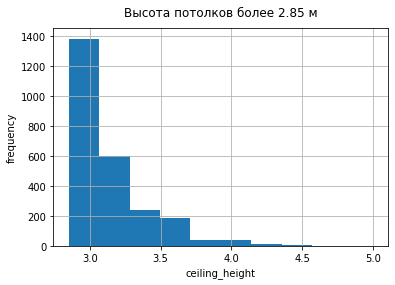

In [143]:
df['ceiling_height'].hist(bins=10, range = (2.85, 5))
plt.title("Высота потолков более 2.85 м", pad=12)
plt.xlabel("ceiling_height")
plt.ylabel("frequency")
plt.show()

In [144]:
len(df.query('ceiling_height > 2.85'))

2426

In [145]:
len(df.query('2.85 < ceiling_height <= 4'))

2392

Среди выбросов свыше 2.85 м 98,6% составляет высота до 4 м включительно, такая высота встречается в старом фонде.

Проверим выбросы менее 2.45 м.

In [146]:
df.query('ceiling_height <= 2.5')['ceiling_height'].sort_values().unique()

array([2.  , 2.2 , 2.25, 2.3 , 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 ])

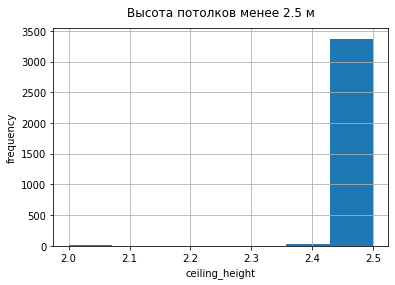

In [147]:
df['ceiling_height'].hist(bins=7, range = (2, 2.5))
plt.title("Высота потолков менее 2.5 м", pad=12)
plt.xlabel("ceiling_height")
plt.ylabel("frequency")
plt.show()

In [148]:
len(df.query('ceiling_height < 2.5'))

66

Таким образом, редкие значения в высоте потолков наблюдаются в значениях менее 2.5 м и более 4 м. Удалим их.

In [149]:
df = df.drop(df.query('ceiling_height < 2.5 or ceiling_height > 4').index).reset_index(drop=True)
len(df)

21409

### Исследование факторов, влияющих на стоимость квартиры

Исследуем влияние квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра, а также зависимость от даты размещения: дня недели, месяца и года на стоимость квартиры. 

**Зависимость площади, числа комнат и удаленности от центра**

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.780592,0.487403,-0.349572
total_area,0.780592,1.000000,0.788355,-0.211621
rooms,0.487403,0.788355,1.000000,-0.141018
cityCenters_nearest,-0.349572,-0.211621,-0.141018,1.000000


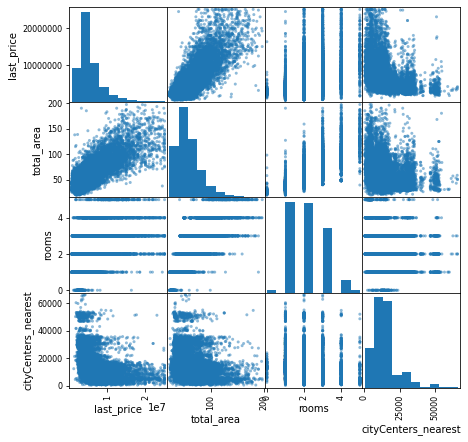

In [150]:
df_corr = df[['last_price', 'total_area',  'rooms', 'cityCenters_nearest']]
display(df_corr.corr())
plt.show()
pd.plotting.scatter_matrix(df_corr, figsize=(7, 7)) 
plt.show()

In [151]:
df['price_square_meter'].corr(df['cityCenters_nearest'])

-0.39403713304003474

Наибольшее влияние на стоимость недвижимости из трех вышеперечисленных факторов имеет площадь (коэффициент корреляции 0.78). 

Корреляция стоимости от  количества комнат не большая (0.47). Рассмотрим зависимость стоимости квадратного метра от количества комнат.

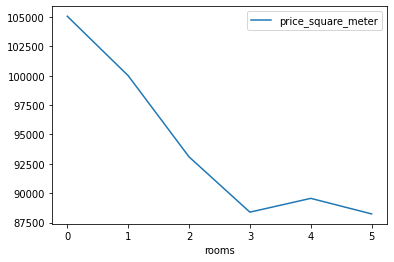

In [152]:
df_corr_rooms = df.pivot_table(index='rooms', values='price_square_meter', aggfunc='median').plot()   

Наблюдается следующая зависимость: самый дорогой квадратный метр у квартир-студий, далее стоимость постепенно снижается до трехкомнатных квартир и остается примерно на одном уровне.

Таким образом, на стоимость недвижимости сильно влияет количество комнат через стоимость квадратного метра. Высокая стоимость квадратного метра квартир-студий и однокомнатных квартир объясняется тем, что их чаще покупают из-за небольшой общей стоимости по сравнению с другими квартирами (чем выше спрос, тем дороже). 

Влияние расстояния до центра на стоимость небольшое 0.34, но здесь может быть погрешность из-за того, что проставленные значения распределены не равномерно по расстоянию. Построим диаграмму рассеивания зависимости расстояния до центра от стоимости квадратного метра.

<function matplotlib.pyplot.show(close=None, block=None)>

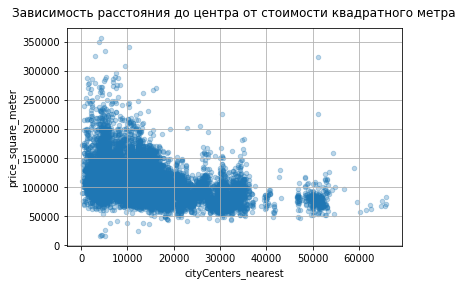

In [153]:
df.plot(y='price_square_meter', x='cityCenters_nearest', kind='scatter', grid=True, alpha= 0.3)
plt.title("Зависимость расстояния до центра от стоимости квадратного метра", pad=12)
plt.show

На диаграмме наблюдается зависимость: чем меньше расстояние до центра, тем больше стоимость квадратного метра.

**Зависимость от этажа (первого, другого и последнего)**

In [154]:
df_floor_category = df.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'median'])
df_floor_category.columns = df_floor_category.columns.droplevel(1)
df_floor_category

,mean,median
floor_category,,
другой,5.784065e+06,4799000.0
первый,4.473122e+06,3900000.0
последний,5.296256e+06,4250000.0


По таблице видно, что зависимость стоимости недвижимости от этажа имеет быть: первые и последние этажи самые дешевые. 

**Зависимость от даты размещения: дня недели, месяца и года**

In [155]:
df_year_exposition = df.pivot_table(index='year_exposition', values='last_price', aggfunc=['median','mean'])
df_year_exposition.columns = df_year_exposition.columns.droplevel(1)
df_year_exposition

,median,mean
year_exposition,,
2014,6950000.0,8.713663e+06
2015,5150000.0,6.326363e+06
2016,4450000.0,5.512865e+06
2017,4465000.0,5.435769e+06
2018,4580000.0,5.431745e+06
2019,5000000.0,5.829537e+06


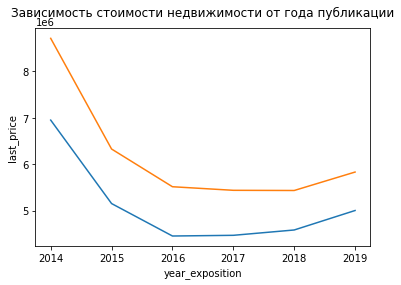

In [156]:
plt.plot(df_year_exposition)
plt.title("Зависимость стоимости недвижимости от года публикации", pad=12)
plt.xlabel('year_exposition')
plt.ylabel('last_price') 
plt.show()

In [157]:
df_month_exposition = df.pivot_table(index='month_exposition', values='last_price', aggfunc=['median','mean'])
df_month_exposition.columns = df_month_exposition.columns.droplevel(1)
df_month_exposition

,median,mean
month_exposition,,
1,4600000.0,5.618099e+06
2,4630000.0,5.575860e+06
3,4600000.0,5.522920e+06
4,4755000.0,5.674379e+06
5,4500000.0,5.477977e+06
6,4360000.0,5.347466e+06
7,4500000.0,5.517952e+06
8,4510000.0,5.444392e+06
9,4650000.0,5.700829e+06


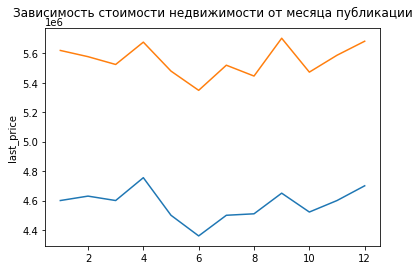

In [158]:
plt.plot(df_month_exposition)
plt.title("Зависимость стоимости недвижимости от месяца публикации", pad=12)
plt.ylabel('last_price') 
plt.show()

In [159]:
df_week_exposition = df.pivot_table(index='week_exposition', values='last_price', aggfunc=['median','mean'])
df_week_exposition.columns = df_week_exposition.columns.droplevel(1)
df_week_exposition

,median,mean
week_exposition,,
0,4600000.0,5.617397e+06
1,4680000.0,5.571334e+06
2,4650000.0,5.610879e+06
3,4600000.0,5.653068e+06
4,4500000.0,5.478416e+06
5,4500000.0,5.336214e+06
6,4500000.0,5.427164e+06


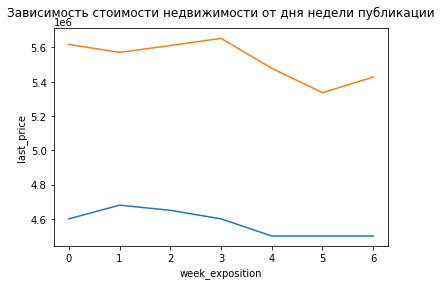

In [160]:
plt.plot(df_week_exposition)
plt.title("Зависимость стоимости недвижимости от дня недели публикации", pad=12)
plt.xlabel('week_exposition')
plt.ylabel('last_price')
plt.show()

Стоимость недвижимости зависит от года размещения: с 2014 по 2016 годы стоимость падала, а с 2018 года начала дорожать.

Зависимость от месяца публикации носит волнообразный характер, корреляции с днем недели тоже не наблюдается.



### Анализ десяти населенных пунктов с наибольшим числом объявлений

Найдем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра.

In [161]:
top_10_locality_name = df.pivot_table(index='locality_name', values='last_price', aggfunc='count').sort_values(by='last_price', ascending=False).head(10)
top_10_locality_name['price_square_meter'] = df.pivot_table(index='locality_name', values='price_square_meter', aggfunc='mean').astype('int').sort_values(by='price_square_meter', ascending=False)
top_10_locality_name.rename(columns={'last_price': 'count'}, inplace=True)

top_10_locality_name

,count,price_square_meter
locality_name,,
Санкт-Петербург,14176,109601
поселок Мурино,510,86116
поселок Шушары,407,78741
Всеволожск,368,68929
Пушкин,334,102627
Колпино,326,75268
поселок Парголово,301,90413
Гатчина,296,68683
деревня Кудрово,266,92615


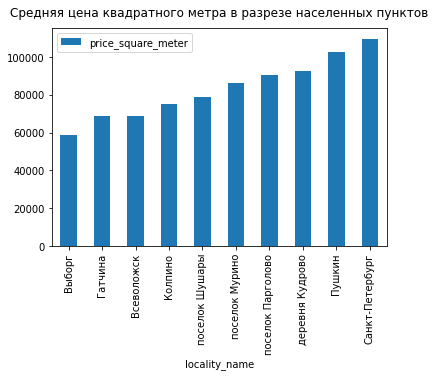

In [162]:
top_10_locality_name.sort_values('price_square_meter').plot(y='price_square_meter', kind='bar')
plt.title("Средняя цена квадратного метра в разрезе населенных пунктов", pad=12)
plt.show()

На 10 населённых пунктов с наибольшим числом объявлений приходится 80% предложений. Самая низкая стоимость жилья в Выборге (58497), самая высокая в Санкт-Петербурге (109601).

### Анализ изменения цены по степени удаленности от центра

Выделим квартиры в Санкт-Петербурге, рассчитаем стоимость квадратного метра в зависимости от расстояния до центра и найдем пределы центра города.

In [163]:
df_locality_spb = df.query('locality_name == "Санкт-Петербург" and ~cityCenters_nearest.isna()')

In [164]:
df_locality_spb['cityCenters_nearest_km'] = df_locality_spb['cityCenters_nearest']  / 1000

In [165]:
df_locality_spb.loc[:, 'cityCenters_nearest_km'] = df_locality_spb.loc[:,'cityCenters_nearest_km'].astype('int')
df_locality_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_square_meter,week_exposition,month_exposition,year_exposition,floor_category,ratio_living_total,ratio_kitchen_total,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481,16
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214,13
3,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000,8
6,5,7915000.0,71.6,2019-04-18,2,2.65,24,41.203774,22,False,...,NaN,NaN,110544,3,4,2019,другой,0.575472,0.263966,11
8,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.600000,7,False,...,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557,15


In [166]:
df_locality_spb['cityCenters_nearest_km'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

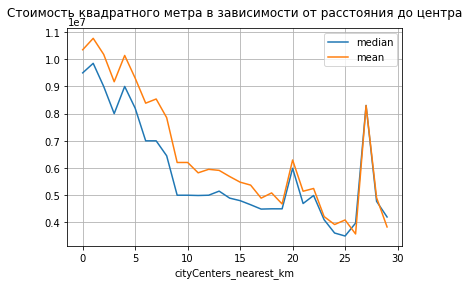

In [167]:
df_spb_price_square_meter = df_locality_spb.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['median', 'mean'])
df_spb_price_square_meter.columns = df_spb_price_square_meter.columns.droplevel(1)
df_spb_price_square_meter.plot(grid=True)
plt.title("Стоимость квадратного метра в зависимости от расстояния до центра", pad=12)
plt.show()


Таким образом, центр Санкт-Петербурга находится в пределах четырех километров.

### Сравнение выводов по квартирам в центре Санкт-Петербурга и общих выводов по всем населенным пунктам

Создадим переменную **df_locality_spb_centre** с данными по центру Санкт-Петербурга. 

In [168]:
df_locality_spb_centre =  df_locality_spb.query('cityCenters_nearest_km <= 4')
len(df_locality_spb_centre)

1675

Проведем анализ площади, цены, числа комнат и высоты потолков, а также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) в центре Санкт-Петербурга. 

Сопоставим исследуемые данные центра Санкт-Петербурга с данными по всем населенным пунктам.

**Исследование площади**

Рассмотрим числовые характеристики и построим диаграмму размаха методом boxplot().

In [169]:
df_locality_spb_centre['total_area'].describe() 

count    1675.000000
mean       82.264191
std        31.884988
min        20.300000
25%        59.750000
50%        77.000000
75%       100.450000
max       197.200000
Name: total_area, dtype: float64

In [170]:
df['total_area'].describe() 

count    21409.000000
mean        56.851594
std         23.852032
min         20.300000
25%         40.000000
50%         51.000000
75%         67.800000
max        197.200000
Name: total_area, dtype: float64

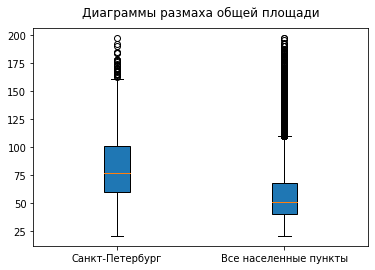

In [171]:
plt.boxplot([df_locality_spb_centre['total_area'], df['total_area']], labels=['Санкт-Петербург', 'Все населенные пункты'], patch_artist=True)
plt.title("Диаграммы размаха общей площади", pad=12)
plt.show()

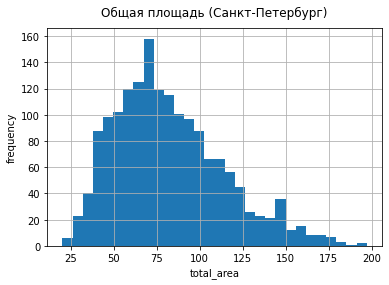

In [172]:
df_locality_spb_centre['total_area'].hist(bins=30)
plt.title("Общая площадь (Санкт-Петербург)", pad=12)
plt.xlabel("total_area")
plt.ylabel("frequency")
plt.show()

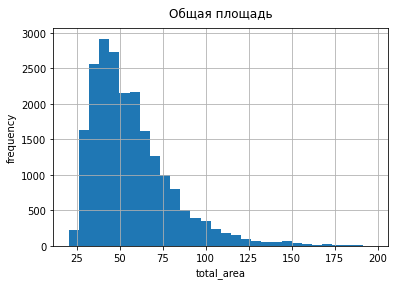

In [173]:
df['total_area'].hist(bins=30)
plt.title("Общая площадь", pad=12)
plt.xlabel("total_area")
plt.ylabel("frequency")
plt.show()

В центре Санкт-Петербурга преобладают квартиры с большей площадью, чем за пределами центра города и в Ленинградской области. 
Большая часть квартир в центре (75%) имеет площадь до 100 м²  (по общей базе до 68 м² ), средняя площадь 82 м²  (57 м²) и медиана 77 м² (51 м²).

**Исследование стоимости квартиры**

Рассмотрим числовые характеристики и построим диаграмму размаха методом boxplot(). Предварительно создадим переменную last_price_spb со значениями цен в тысячах. А также создадим переменную last_price_new  со значениями цен в тысячах для всей базы после удаления редких и выбивающих значений. 

In [174]:
last_price_spb = df_locality_spb_centre['last_price'] / 1000

In [175]:
last_price_new = df['last_price'] / 1000

In [176]:
last_price_spb.describe() 

count     1675.000000
mean      9962.310509
std       4460.007928
min       1600.000000
25%       6800.000000
50%       8900.000000
75%      12000.000000
max      25000.000000
Name: last_price, dtype: float64

In [177]:
last_price_new.describe() 

count    21409.000000
mean      5555.325475
std       3499.291143
min        620.000000
25%       3429.000000
50%       4600.000000
75%       6500.000000
max      25000.000000
Name: last_price, dtype: float64

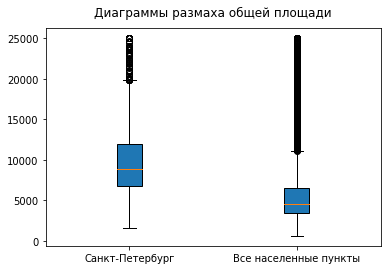

In [178]:
plt.boxplot([last_price_spb, last_price_new], labels=['Санкт-Петербург', 'Все населенные пункты'], patch_artist=True)
plt.title("Диаграммы размаха общей площади", pad=12)
plt.show()

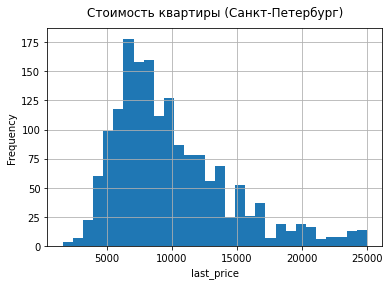

In [179]:
last_price_spb.hist(bins=30)
plt.title("Стоимость квартиры (Санкт-Петербург)", pad=12)
plt.xlabel("last_price")
plt.ylabel("Frequency")
plt.show()

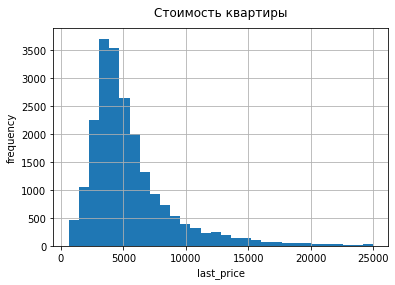

In [180]:
last_price_new.hist(bins=30)
plt.title("Стоимость квартиры", pad=12)
plt.xlabel("last_price")
plt.ylabel("frequency")
plt.show()

 Квартиры в центре Санкт-Петербурга дороже, чем за его пределами. Средняя цена 9,96 млн. (5,6 млн. за пределами), медиана 8,9 млн. (4,6 млн. за пределами).

Стоимость большинства квартир (75%), представленных на продажу в центре, до 12 млн. (6,5 млн. за пределами).

**Исследование количества комнат**

In [181]:
df_locality_spb_centre['rooms'].describe() 

count    1675.000000
mean        2.735522
std         1.089166
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

In [182]:
df['rooms'].describe() 

count    21409.000000
mean         2.005932
std          0.948266
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

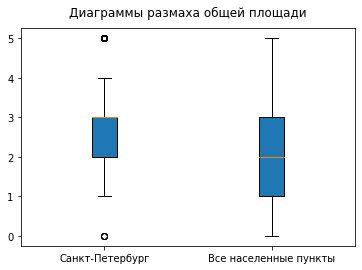

In [183]:
plt.boxplot([df_locality_spb_centre['rooms'], df['rooms']], labels=['Санкт-Петербург', 'Все населенные пункты'], patch_artist=True)
plt.title("Диаграммы размаха общей площади", pad=12)
plt.show()

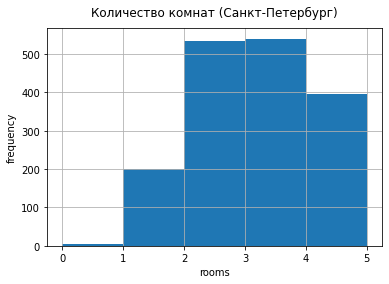

In [184]:
df_locality_spb_centre['rooms'].hist(bins=5)
plt.title("Количество комнат (Санкт-Петербург)", pad=12)
plt.xlabel("rooms")
plt.ylabel("frequency")
plt.show()


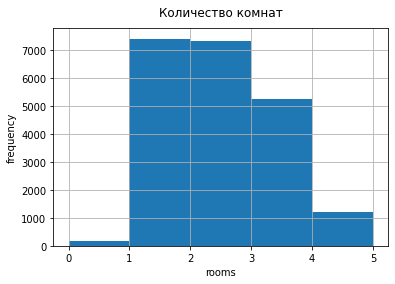

In [185]:
df['rooms'].hist(bins=5)
plt.title("Количество комнат", pad=12)
plt.xlabel("rooms")
plt.ylabel("frequency")
plt.show()

В центре Санкт-Петербурга преобладают двух и трех комнатные квартиры, в то время как в общем одна и двухкомнатные.  Основная часть предложений до 3-х комнат включительно, что ожидаемо.

**Исследование высоты потолков**

In [186]:
df_locality_spb_centre['ceiling_height'].describe() 

count    1675.000000
mean        2.970107
std         0.340438
min         2.500000
25%         2.650000
50%         2.950000
75%         3.200000
max         4.000000
Name: ceiling_height, dtype: float64

In [187]:
df['ceiling_height'].describe() 

count    21409.000000
mean         2.687535
std          0.193902
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

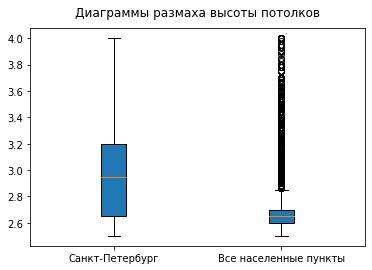

In [188]:
plt.boxplot([df_locality_spb_centre['ceiling_height'], df['ceiling_height']], labels=['Санкт-Петербург', 'Все населенные пункты'], patch_artist=True)
plt.title("Диаграммы размаха высоты потолков", pad=12)
plt.show()

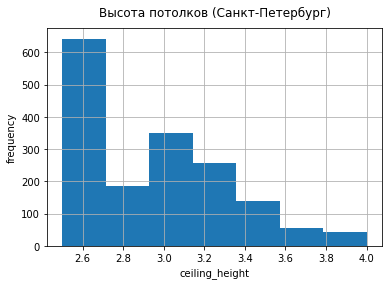

In [189]:
df_locality_spb_centre['ceiling_height'].hist(bins=7)
plt.title("Высота потолков (Санкт-Петербург)", pad=12)
plt.xlabel("ceiling_height")
plt.ylabel("frequency")
plt.show()

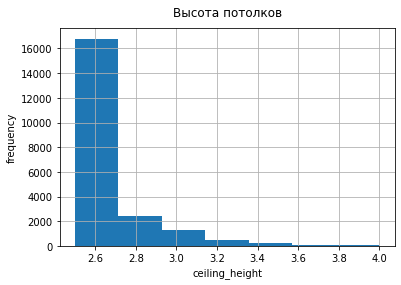

In [190]:
df['ceiling_height'].hist(bins=7)
plt.title("Высота потолков", pad=12)
plt.xlabel("ceiling_height")
plt.ylabel("frequency")
plt.show()

В центре Санкт-Петербурга высота потолков выше, чем за его пределами: средняя высота 2,97 м (2,69 м за его пределами), медиана 2,95 м (2,65 м). Превышение высоты потолков в центре происходит за счет существенной доли высоты более 2,8 м, тогда как за пределами она небольшая.

**Исследование факторов, влияющих на стоимость квартиры**

Исследуем влияние площади, числа комнат, этажа, удалённости от центра, а также зависимость от даты размещения: дня недели, месяца и года на стоимость квартиры.

***Зависимость площади, числа комнат и удаленности от центра***

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.681484,0.401978,-0.033069
total_area,0.681484,1.000000,0.757854,-0.041147
rooms,0.401978,0.757854,1.000000,-0.072570
cityCenters_nearest,-0.033069,-0.041147,-0.072570,1.000000


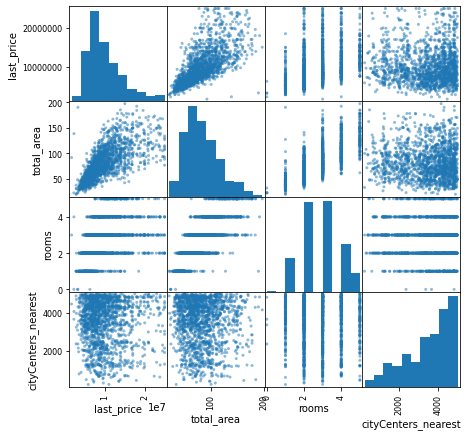

In [191]:
df_corr_spb = df_locality_spb_centre[['last_price', 'total_area',  'rooms', 'cityCenters_nearest']]
display(df_corr_spb.corr())
plt.show()
pd.plotting.scatter_matrix(df_corr_spb, figsize=(7, 7)) 
plt.show()

Наибольшее влияние на стоимость недвижимости из трех вышеперечисленных факторов в центре Санкт-Петербурга имеет площадь (коэффициент корреляции 0.68).

Корреляция стоимости от количества комнат не большая (0.4). Рассмотрим зависимость стоимости квадратного метра от количества комнат.





Влияния расстояния до центра на стоимость практически не наблюдается 0.05, но это может объясняться маленьким диаметром центра.

Таким образом, уровень влияния площади и числа комнат в центре и за его пределами идентично. При этом зависимость цены от расстояния по общей базе небольшое 0,34 и не наблюдается в центре в связи с маленьким расстоянием центра. 

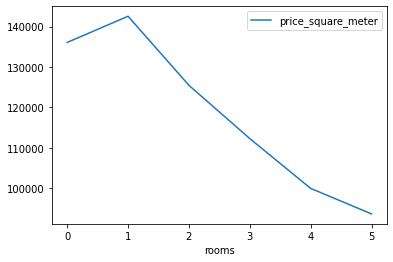

In [192]:
df_corr_rooms_spb =  df_locality_spb_centre.pivot_table(index='rooms', values='price_square_meter', aggfunc='median').plot()   

Наблюдается следующая зависимость: самый дорогой квадратный метр у квартир-студий и однокомнатных квартир, далее стоимость постепенно снижается.

Таким образом, на стоимость недвижимости сильно влияет количество комнат через стоимость квадратного метра. Высокая стоимость квадратного метра квартир-студий и однокомнатных квартир объясняется тем, что их чаще покупают из-за небольшой общей стоимости по сравнению с другими квартирами (чем выше спрос, тем дороже).

Влияние расстояния до центра на стоимость не наблюдается (0.03). Построим диаграмму рассеивания зависимости расстояния до центра от стоимости квадратного метра.

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='price_square_meter'>

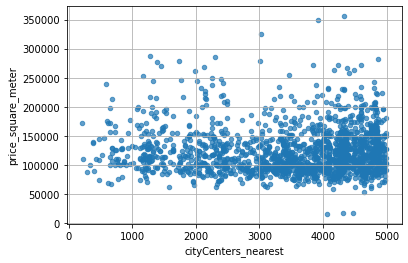

In [193]:
df_locality_spb_centre.plot(y='price_square_meter', x='cityCenters_nearest', kind='scatter', grid=True, alpha= 0.7)

На диаграмме практически не наблюдается зависимости (есть небольшая тенденция увеличения нижней границы стоимости квадратного метра в сторону центра), но это может быть обусловлено небольшим расстоянием для репрезентативной выборки.

**Зависимость от этажа (первого, другого и последнего)**

In [194]:
df_floor_category_spb = df_locality_spb_centre.pivot_table(index='floor_category', values='last_price', aggfunc=['mean', 'median'])
df_floor_category_spb.columns = df_floor_category_spb.columns.droplevel(1)
df_floor_category_spb

,mean,median
floor_category,,
другой,1.036821e+07,9300000.0
первый,7.673879e+06,6800000.0
последний,1.007615e+07,8945000.0


По таблице видно, что зависимость стоимости недвижимости от этажа имеет быть: первые и последние этажи самые дешевые. 

**Зависимость от даты размещения: дня недели, месяца и года**

In [195]:
df_year_exposition_spb = df_locality_spb_centre.pivot_table(index='year_exposition', values='last_price', aggfunc=['median','mean'])
df_year_exposition_spb.columns = df_year_exposition_spb.columns.droplevel(1)
df_year_exposition_spb

,median,mean
year_exposition,,
2014,13241000.0,1.358720e+07
2015,9700000.0,1.026862e+07
2016,9400000.0,1.005125e+07
2017,8500000.0,9.596423e+06
2018,8700000.0,9.891221e+06
2019,9500000.0,1.084551e+07


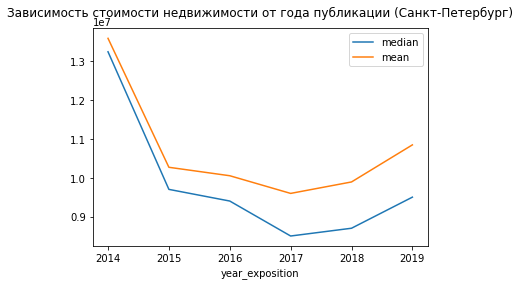

In [196]:
df_year_exposition_spb.plot()
plt.title("Зависимость стоимости недвижимости от года публикации (Санкт-Петербург)", pad=12)
plt.show()

In [197]:
df_month_exposition_spb = df_locality_spb_centre.pivot_table(index='month_exposition', values='last_price', aggfunc=['median','mean'])
df_month_exposition_spb.columns = df_month_exposition_spb.columns.droplevel(1)
df_month_exposition_spb

,median,mean
month_exposition,,
1,9393000.0,1.067023e+07
2,9300000.0,1.077385e+07
3,9300000.0,1.004363e+07
4,8737623.0,1.005096e+07
5,9095000.0,9.801794e+06
6,8425000.0,9.718677e+06
7,8975000.0,9.558976e+06
8,8200000.0,9.304584e+06
9,9400000.0,9.924884e+06


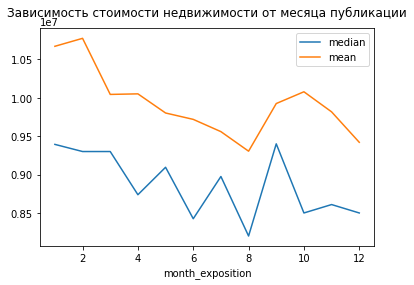

In [198]:
df_month_exposition_spb.plot()
plt.title("Зависимость стоимости недвижимости от месяца публикации", pad=12)
plt.show()

In [199]:
df_week_exposition_spb = df_locality_spb_centre.pivot_table(index='week_exposition', values='last_price', aggfunc=['median','mean'])
df_week_exposition_spb.columns = df_week_exposition_spb.columns.droplevel(1)
df_week_exposition_spb

,median,mean
week_exposition,,
0,9000000.0,1.006327e+07
1,9300000.0,1.016588e+07
2,8980000.0,1.014305e+07
3,8580000.0,9.828088e+06
4,8800000.0,9.851721e+06
5,8495000.0,9.126339e+06
6,9200000.0,1.029306e+07


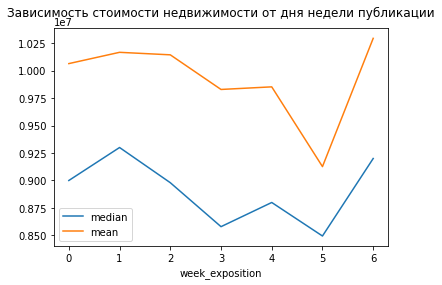

In [200]:
df_week_exposition_spb.plot()
plt.title("Зависимость стоимости недвижимости от дня недели публикации", pad=12)
plt.show()

Стоимость недвижимости в центре зависит от года размещения: с 2014 по 2017 годы стоимость падала, а с 2018 года начала дорожать. Зависимости от месяца публикации  и днем недели не наблюдается.

## Общий вывод

Исследован архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

Проведен анализ данных (стоимость, площадь, количество комнат, высота потолков, время продажи, расстояние до центра) и определены факторы, влияющие на стоимость квартиры. 

Параметры, влияющие на стоимость недвижимости:

* **Площадь** -  прямая зависимость, чем больше площадь, тем выше стоимость (коэффициент корреляции 0,78).

* **количество комнат** - на стоимость недвижимости сильно влияет количество комнат через стоимость квадратного метра. Самый дорогой квадратный метр у квартир-студий, далее стоимость постепенно снижается до трехкомнатных квартир и остается примерно на одном уровне. Высокая стоимость квадратного метра квартир-студий и однокомнатных квартир объясняется тем, что их чаще покупают из-за небольшой общей стоимости по сравнению с другими квартирами (чем выше спрос, тем дороже).

* **расстояние до центра** -  наблюдается зависимость: чем меньше расстояние до центра, тем больше стоимость квадратного метра.


* **местоположение населенного пункта** - анализ  10 населённых пунктов с наибольшим числом объявлений показал, что средняя цена квадратного метра сильно отличается в зависимости от местоположения, например, средняя цена квадратного метра в Выборге на 47% меньше, чем в Санкт-Петербурге.

* **этаж** - первые и последние этажи самые дешевые, при этом первый этаж дешевле последнего.

* **время продажи** - стоимость недвижимости существенно зависит от года размещения (с 2014 по 2016 годы стоимость падала, а с 2018 года начала дорожать). Зависимость от месяца публикации и дня недели не наблюдается.